# Simple Linear Regression

Untuk final project kali ini saya memilih membuat simple linear regression mengenai house pricing dimana tujuannya adalah untuk mengetahui apakah terdapat hubungan antara banyaknya kamar yang ditawarkan dengan harga rumah. Hipotesis awal adalah dengan semakin banyaknya kamar yang ditawarkan maka harga rumah akan semakin tinggi.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data.csv', usecols=['bedrooms', 'price'])

In [3]:
df.head()

,price,bedrooms
0,313000.0,3.0
1,2384000.0,5.0
2,342000.0,3.0
3,420000.0,3.0
4,550000.0,4.0


In [4]:
df.shape

(4600, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     4600 non-null   float64
 1   bedrooms  4600 non-null   float64
dtypes: float64(2)
memory usage: 72.0 KB


In [6]:
df.describe()

,price,bedrooms
count,4.600000e+03,4600.000000
mean,5.519630e+05,3.400870
std,5.638347e+05,0.908848
min,0.000000e+00,0.000000
25%,3.228750e+05,3.000000
50%,4.609435e+05,3.000000
75%,6.549625e+05,4.000000
max,2.659000e+07,9.000000


In [7]:
df.isnull().sum()

price       0
bedrooms    0
dtype: int64

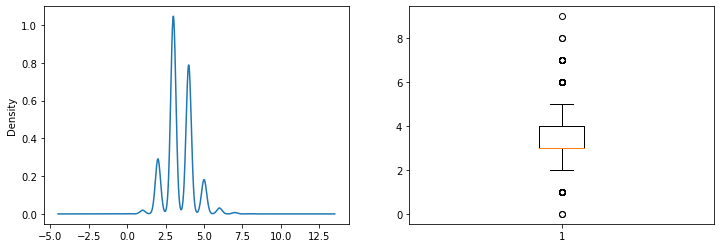

In [8]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['bedrooms'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

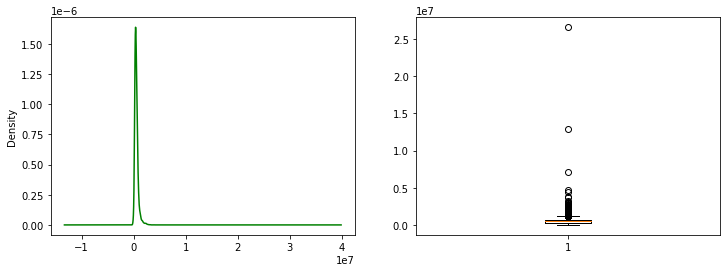

In [9]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

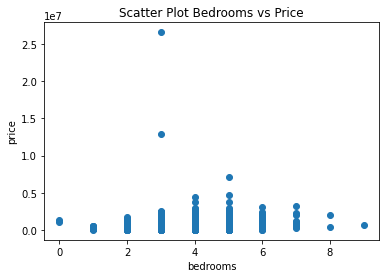

In [10]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Scatter Plot Bedrooms vs Price')
plt.show()

In [11]:
df.corr()

,price,bedrooms
price,1.000000,0.200336
bedrooms,0.200336,1.000000


In [12]:
x = df['bedrooms'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [16]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[118050.93026346]]
[147866.98264259]


In [17]:
lin_reg.score(x_test, y_test)

0.055846975414895916

Text(0.5, 1.0, 'Plot Bedrooms vs Price')

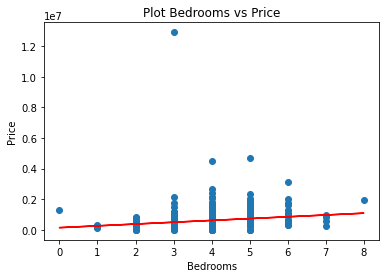

In [18]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Plot Bedrooms vs Price')

In [19]:
lin_reg.predict([[3]])

array([[502019.77343297]])

In [20]:
lin_reg.predict([[4]])

array([[620070.70369643]])

In [21]:
lin_reg.predict([[5]])

array([[738121.63395989]])

Berdasarkan hasil diatas dapat diketahui bahwa hipotesis awal benar, yaitu semakin banyak kamar yang ditawarkan maka harga rumah akan semakin mahal. rumah dengan 3 ruang kamar diprediksi memiliki harga 502.019, rumah dengan 4 ruang kamar diprediksi memiliki harga 620.070, dan rumah dengan 5 ruang kamar diprediksi memiliki harga 738.121.